In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import pandas as pd
import numpy as np

from sklearn import datasets

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score
from prettytable import PrettyTable

In [2]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target

### Preprocessing

In [3]:
##

## Model selection

In [4]:
randomforest = RandomForestClassifier()
naivebayes = MultinomialNB()
logisticregression = LogisticRegression()

models = [randomforest, naivebayes, logisticregression]
targets = ["RandomForest", "NaiveBayes", "LogisticRegression"]

In [5]:
def evaluateModels(models, targets):
    
    scores = pd.DataFrame()
    
    for model,target in zip(models,targets):
        cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores[target] = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        
    return scores

In [6]:
scores = evaluateModels(models,targets)

Text(0, 0.5, 'Accuracy ***')

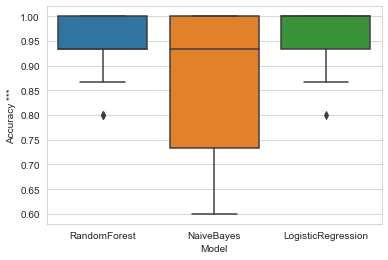

In [7]:
sns.boxplot(x="variable", y="value", data=pd.melt(scores))
plt.xlabel("Model")
plt.ylabel("Accuracy ***")

## Hyperparameter tuning

In [15]:
def doGridSearch(model,model_name,hyperparams,X,y):
    gs = GridSearchCV(estimator=model,  
                         param_grid=hyperparams,
                         scoring='accuracy',
                         cv=5,
                         n_jobs=-1)

    gs.fit(X, y)
    return [model_name,gs.best_score_ ]

In [19]:
hyperparams_RF = {
    "n_estimators" : [100,300,500],
    "criterion": ["gini", "entropy"],
    "max_features": ["auto", "sqrt", "log2"],
    "random_state": [42]
}

hyperparams_LR ={
    'C': np.logspace(-3,3,7), 
    'penalty':["l1","l2"], # l1 lasso l2 ridge
    'random_state' : [42],
    'max_iter' : [1000]
} 

gridsearch_models = ["Random Forest","Logistic Regression"]
classifiers = [RandomForestClassifier(), LogisticRegression()]
hyperparams_list = [hyperparams_RF,hyperparams_LR]

In [20]:
tuning_table = PrettyTable()
tuning_table.field_names = ['MODEL', 'BEST ACCURACY']

for name,params,clf in zip(gridsearch_models,hyperparams_list,classifiers):
    tuning_table.add_row(doGridSearch(clf,name,params,X,y))
    
print(tuning_table)

+---------------------+--------------------+
|        MODEL        |   BEST ACCURACY    |
+---------------------+--------------------+
|    Random Forest    | 0.9666666666666668 |
| Logistic Regression | 0.9800000000000001 |
+---------------------+--------------------+


## Deploy